<a href="https://colab.research.google.com/github/nomiam/dw_matrix_road_sign/blob/master/dzien4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Runtime -> change runfime type -> GPU

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, exposure

import os
from datetime import datetime

from sklearn.metrics import accuracy_score

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

In [6]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [7]:
ls

data/  LICENSE  logs/


In [8]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')
train.keys()
test.keys()


dict_keys(['coords', 'labels', 'features', 'sizes'])

In [9]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((34799, 32, 32, 3), (34799,), (4410, 32, 32, 3), (4410,))

In [10]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [11]:
len(np.unique(y_train))

43

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1:y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [14]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Flatten(),
  Dense(num_classes, activation='softmax'),
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 43)                2476843   
Total params: 2,478,635
Trainable params: 2,478,635
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 8.4290 - accuracy: 0.8059


In [0]:
def get_cnn_v1(input_shape, num_classes):
	return Sequential([
  		Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  		Flatten(),
  		Dense(num_classes, activation='softmax'),
	])


def train_model(model, X_train, y_train, params_fit={}):
	model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

	logdir = os.path.join("logs", datetime.now().strftime('%Y%m%d-%H%M%S'))
	tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

	model.fit(
              X_train, 
              y_train,
              batch_size = params_fit.get('batch_size', 128),
              epochs=params_fit.get('epochs', 5),
              verbose=params_fit.get('verbose', 1),
              validation_data=params_fit.get('validation_data', (X_train, y_train)),
              callbacks = [tensorboard_callback]
              )
	return model


In [17]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 30.7194 - accuracy: 0.7217 - val_loss: 0.3076 - val_accuracy: 0.9215
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2981 - accuracy: 0.9288 - val_loss: 0.1835 - val_accuracy: 0.9511
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1845 - accuracy: 0.9568 - val_loss: 0.1242 - val_accuracy: 0.9707
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1491 - accuracy: 0.9655 - val_loss: 0.1277 - val_accuracy: 0.9693
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1348 - accuracy: 0.9707 - val_loss: 0.0815 - val_accuracy: 0.9812


In [18]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob  # zwraca maciez wiec bedziemy ją konwertowac

array([[4.6798832e-11, 7.5542135e-07, 2.8874194e-05, ..., 4.6779869e-09,
        8.4196113e-04, 2.5567826e-07],
       [9.7410503e-11, 3.2700926e-05, 9.1595640e-03, ..., 4.0521482e-07,
        1.7298502e-05, 4.3193842e-07],
       [7.4365696e-12, 4.8442973e-07, 4.8244115e-06, ..., 6.9734768e-10,
        9.6035411e-04, 1.4506204e-06],
       ...,
       [6.9429871e-04, 4.3648467e-03, 1.3029703e-02, ..., 5.1217423e-05,
        1.8225634e-03, 1.9767659e-04],
       [3.3791186e-04, 2.8776505e-04, 3.9789937e-03, ..., 1.1550243e-04,
        1.5427321e-03, 2.6762606e-05],
       [9.4482712e-05, 1.0156590e-03, 1.5652002e-03, ..., 5.3724325e-06,
        8.4386981e-04, 1.5415701e-05]], dtype=float32)

In [19]:
y_pred_prob[0]  # zwraca info z jakim prawdopodomienstwen malezy do któej klasy

array([4.6798832e-11, 7.5542135e-07, 2.8874194e-05, 1.4201571e-03,
       8.9140437e-09, 9.7695331e-05, 1.6538949e-07, 6.2897656e-05,
       3.6183333e-06, 2.8096097e-06, 2.6068102e-07, 3.6951352e-08,
       5.9621902e-07, 2.0315852e-06, 2.4595931e-13, 4.5824041e-07,
       8.8047005e-07, 2.6729712e-13, 1.6785489e-12, 1.4427232e-11,
       2.1766230e-06, 1.1336826e-13, 6.9179711e-16, 4.4430006e-08,
       3.4558210e-11, 1.0837346e-11, 1.8427902e-07, 1.0359607e-07,
       1.1168147e-07, 6.0612027e-10, 3.8243806e-13, 2.8869976e-13,
       9.9753404e-01, 1.6897381e-11, 6.0246079e-14, 4.9726562e-10,
       6.9996768e-09, 4.4522888e-12, 1.0288725e-13, 1.9895771e-12,
       4.6779869e-09, 8.4196113e-04, 2.5567826e-07], dtype=float32)

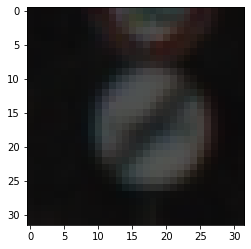

In [22]:
plt.imshow(X_test[0])

In [24]:
ls data

signnames.csv  test.p  train.p


In [25]:
df = pd.read_csv('data/signnames.csv')
df.to_dict()['b']

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

In [0]:
labels_dict = df.to_dict()['b']

<BarContainer object of 43 artists>

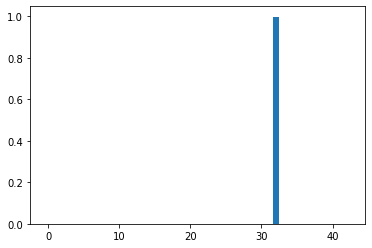

In [27]:
plt.bar(range(43), y_pred_prob[0])

In [28]:
labels_dict[ np.argmax( y_pred_prob[0] ) ]  # pokazuje który znak est najbardziej prawdopodobny

'End of all speed and passing limits'

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):
	y_test_norm = np.argmax(y_test, axis=1)

	y_pred_prob = model_trained.predict(X_test)
	y_pred = np.argmax(y_pred_prob, axis=1)

	return scoring(y_test_norm, y_pred)


In [36]:
predict(model_trained, X_test, y_test)

0.818140589569161

In [0]:
def train_and_predict(model):
	model_trained = train_model(model,X_train, y_train)
	return predict(model_trained, X_test, y_test)

In [0]:
def get_cnn_v2(input_shape, num_classes):
	return Sequential([
		Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
		MaxPool2D(),
		Dropout(0.3),

		Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
		MaxPool2D(),
		Dropout(0.3),

		Flatten(),

		Dense(1024, activation='relu'),
		Dropout(0.3),

		Dense(num_classes, activation='softmax'),
	])

In [46]:
train_and_predict( get_cnn_v2(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 4.9056 - accuracy: 0.3730 - val_loss: 1.0140 - val_accuracy: 0.7454
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.9628 - accuracy: 0.7152 - val_loss: 0.3108 - val_accuracy: 0.9278
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.5079 - accuracy: 0.8474 - val_loss: 0.1671 - val_accuracy: 0.9618
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3449 - accuracy: 0.8962 - val_loss: 0.1018 - val_accuracy: 0.9736
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2609 - accuracy: 0.9204 - val_loss: 0.0662 - val_accuracy: 0.9854


0.9018140589569161

In [0]:
def get_cnn_v3(input_shape, num_classes):
	return Sequential([
		Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
		Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
		MaxPool2D(),
		Dropout(0.3),

		Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
		Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
		MaxPool2D(),
		Dropout(0.3),

		Flatten(),

		Dense(1024, activation='relu'),
		Dropout(0.3),

		Dense(num_classes, activation='softmax'),
	])

In [48]:
train_and_predict( get_cnn_v3(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 5s 20ms/step - loss: 1.9749 - accuracy: 0.5727 - val_loss: 0.2381 - val_accuracy: 0.9510
Epoch 2/5
272/272 [==============================] - 5s 19ms/step - loss: 0.3967 - accuracy: 0.8910 - val_loss: 0.1214 - val_accuracy: 0.9679
Epoch 3/5
272/272 [==============================] - 5s 19ms/step - loss: 0.2315 - accuracy: 0.9350 - val_loss: 0.0510 - val_accuracy: 0.9892
Epoch 4/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1580 - accuracy: 0.9545 - val_loss: 0.0272 - val_accuracy: 0.9944
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1339 - accuracy: 0.9621 - val_loss: 0.0144 - val_accuracy: 0.9966


0.971655328798186

In [0]:
def get_cnn_v4(input_shape, num_classes):
	return Sequential([
		Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
		Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
		MaxPool2D(),
		Dropout(0.3),

		Conv2D(filters=64, kernel_size=(3,3), activation='relu',  padding='same'),
		Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
		MaxPool2D(),
		Dropout(0.3),

		Conv2D(filters=64, kernel_size=(3,3), activation='relu',  padding='same'),
		Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
		MaxPool2D(),
		Dropout(0.3),

		Flatten(),

		Dense(1024, activation='relu'),
		Dropout(0.3),

		Dense(num_classes, activation='softmax'),
	])

In [50]:
train_and_predict( get_cnn_v4(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 6s 22ms/step - loss: 2.2222 - accuracy: 0.3874 - val_loss: 0.5776 - val_accuracy: 0.8317
Epoch 2/5
272/272 [==============================] - 6s 21ms/step - loss: 0.5868 - accuracy: 0.8187 - val_loss: 0.1156 - val_accuracy: 0.9692
Epoch 3/5
272/272 [==============================] - 6s 21ms/step - loss: 0.2892 - accuracy: 0.9130 - val_loss: 0.0625 - val_accuracy: 0.9814
Epoch 4/5
272/272 [==============================] - 6s 21ms/step - loss: 0.1885 - accuracy: 0.9441 - val_loss: 0.0323 - val_accuracy: 0.9902
Epoch 5/5
272/272 [==============================] - 6s 21ms/step - loss: 0.1607 - accuracy: 0.9531 - val_loss: 0.0260 - val_accuracy: 0.9918


0.9752834467120182

In [0]:
def get_cnn_v5(input_shape, num_classes):
	return Sequential([
		Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
		Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
		MaxPool2D(),
		Dropout(0.3),

		Conv2D(filters=64, kernel_size=(3,3), activation='relu',  padding='same'),
		Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
		MaxPool2D(),
		Dropout(0.3),

		Conv2D(filters=64, kernel_size=(3,3), activation='relu',  padding='same'),
		Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
		MaxPool2D(),
		Dropout(0.3),

		Flatten(),

		Dense(1024, activation='relu'),
		Dropout(0.3),

		Dense(1024, activation='relu'),
		Dropout(0.3),

		Dense(num_classes, activation='softmax'),
	])

In [52]:
train_and_predict( get_cnn_v5(input_shape, num_classes) )

Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.6267 - accuracy: 0.2988 - val_loss: 1.0778 - val_accuracy: 0.6471
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.9379 - accuracy: 0.7070 - val_loss: 0.3159 - val_accuracy: 0.9013
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.4924 - accuracy: 0.8444 - val_loss: 0.1387 - val_accuracy: 0.9587
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.3399 - accuracy: 0.8937 - val_loss: 0.0930 - val_accuracy: 0.9746
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2590 - accuracy: 0.9210 - val_loss: 0.0509 - val_accuracy: 0.9872


0.9596371882086168

In [53]:
X_train[0].shape # zwraca info o liczbie kanałów

(32, 32, 3)

In [54]:

color.rgb2gray( X_train[0] ).shape # zmniejszamy liczbe kanałow - przekształacmy do szarosci

(32, 32)

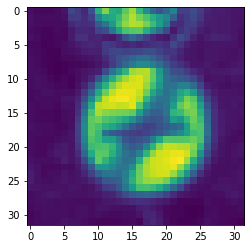

In [55]:
plt.imshow(color.rgb2gray( X_train[0] ))

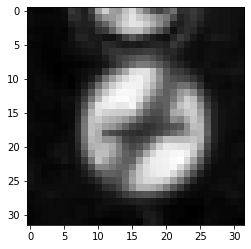

In [65]:
plt.imshow(color.rgb2gray( X_train[0] ), cmap=plt.get_cmap('gray'))

konwertujemy zdjecia do szarych

In [0]:
X_train_gray = color.rgb2gray( X_train ).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray( X_test ).reshape(-1, 32, 32, 1)

In [64]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)


Epoch 1/5
272/272 [==============================] - 6s 23ms/step - loss: 2.6131 - accuracy: 0.2628 - val_loss: 0.7227 - val_accuracy: 0.7679
Epoch 2/5
272/272 [==============================] - 6s 22ms/step - loss: 0.5043 - accuracy: 0.8365 - val_loss: 0.1344 - val_accuracy: 0.9591
Epoch 3/5
272/272 [==============================] - 6s 22ms/step - loss: 0.2245 - accuracy: 0.9273 - val_loss: 0.0690 - val_accuracy: 0.9782
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1578 - accuracy: 0.9508 - val_loss: 0.0377 - val_accuracy: 0.9891
Epoch 5/5
272/272 [==============================] - 6s 22ms/step - loss: 0.1107 - accuracy: 0.9655 - val_loss: 0.0235 - val_accuracy: 0.9938


0.9759637188208616